### Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Data Set

In [2]:
data=pd.read_csv('C:/Users/User/Desktop/NYC_Taxi/2018.csv')

In [3]:
data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-04-29 13:58:05.0000000,2018-04-29 14:02:49.0000000,N,1,74,75,1,1.33,6.0,0.0,0.5,0.0,0.0,0.3,6.8,2,1.0
1,2,2018-04-29 17:48:02.0000000,2018-04-29 17:52:55.0000000,N,1,74,75,1,1.12,6.0,0.0,0.5,0.0,0.0,0.3,6.8,2,1.0
2,2,2018-04-29 18:25:03.0000000,2018-04-29 18:30:59.0000000,N,1,74,75,1,1.10,6.0,0.0,0.5,0.0,0.0,0.3,6.8,2,1.0
3,2,2018-04-29 19:14:14.0000000,2018-04-29 19:20:35.0000000,N,1,74,75,1,1.02,6.0,0.0,0.5,0.0,0.0,0.3,6.8,2,1.0
4,2,2018-04-30 06:30:16.0000000,2018-04-30 06:34:57.0000000,N,1,74,75,1,1.46,6.0,0.0,0.5,0.0,0.0,0.3,6.8,2,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807303 entries, 0 to 8807302
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   lpep_pickup_datetime   object 
 2   lpep_dropoff_datetime  object 
 3   store_and_fwd_flag     object 
 4   RatecodeID             int64  
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   passenger_count        int64  
 8   trip_distance          float64
 9   fare_amount            float64
 10  extra                  float64
 11  mta_tax                float64
 12  tip_amount             float64
 13  tolls_amount           float64
 14  improvement_surcharge  float64
 15  total_amount           float64
 16  payment_type           int64  
 17  trip_type              float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1.2+ GB


In [5]:
# As time in object or must be in datetime 
# time is convert into datetime 

In [6]:
data["lpep_pickup_datetime"] = pd.to_datetime(data["lpep_pickup_datetime"])
data["lpep_dropoff_datetime"] = pd.to_datetime(data["lpep_dropoff_datetime"])


In [7]:
data['pickup_date'] = [d.date() for d in data['lpep_pickup_datetime']]
data['pickup_time'] = [d.time() for d in data['lpep_pickup_datetime']]

data['dropoff_date'] = [d.date() for d in data['lpep_dropoff_datetime']]
data['dropoff_time'] = [d.time() for d in data['lpep_dropoff_datetime']]

In [8]:
data.drop(["lpep_pickup_datetime"], axis = 1, inplace = True)
data.drop(["lpep_dropoff_datetime"], axis = 1, inplace = True)

In [9]:
data.head()

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,pickup_date,pickup_time,dropoff_date,dropoff_time
0,2,N,1,74,75,1,1.33,6.0,0.0,0.5,0.0,0.0,0.3,6.8,2,1.0,2018-04-29,13:58:05,2018-04-29,14:02:49
1,2,N,1,74,75,1,1.12,6.0,0.0,0.5,0.0,0.0,0.3,6.8,2,1.0,2018-04-29,17:48:02,2018-04-29,17:52:55
2,2,N,1,74,75,1,1.10,6.0,0.0,0.5,0.0,0.0,0.3,6.8,2,1.0,2018-04-29,18:25:03,2018-04-29,18:30:59
3,2,N,1,74,75,1,1.02,6.0,0.0,0.5,0.0,0.0,0.3,6.8,2,1.0,2018-04-29,19:14:14,2018-04-29,19:20:35
4,2,N,1,74,75,1,1.46,6.0,0.0,0.5,0.0,0.0,0.3,6.8,2,1.0,2018-04-30,06:30:16,2018-04-30,06:34:57


In [10]:
data["pickup_date"] = pd.to_datetime(data["pickup_date"])
data["dropoff_date"] = pd.to_datetime(data["dropoff_date"])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807303 entries, 0 to 8807302
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   store_and_fwd_flag     object        
 2   RatecodeID             int64         
 3   PULocationID           int64         
 4   DOLocationID           int64         
 5   passenger_count        int64         
 6   trip_distance          float64       
 7   fare_amount            float64       
 8   extra                  float64       
 9   mta_tax                float64       
 10  tip_amount             float64       
 11  tolls_amount           float64       
 12  improvement_surcharge  float64       
 13  total_amount           float64       
 14  payment_type           int64         
 15  trip_type              float64       
 16  pickup_date            datetime64[ns]
 17  pickup_time            object        
 18  dropoff_date          

In [12]:
data.shape

(8807303, 20)

In [13]:
data.describe().round()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
count,8807303.0,8807303.0,8807303.0,8807303.0,8807303.0,8807303.0,8807303.0,8807303.0,8807303.0,8807303.0,8807303.0,8807303.0,8807303.0,8807303.0,8807240.0
mean,2.0,1.0,111.0,129.0,1.0,3.0,13.0,0.0,0.0,1.0,0.0,0.0,16.0,1.0,1.0
std,0.0,1.0,74.0,77.0,1.0,5.0,13.0,0.0,0.0,2.0,1.0,0.0,14.0,1.0,0.0
min,1.0,1.0,1.0,1.0,0.0,0.0,-500.0,-25.0,-0.0,-100.0,-15.0,-0.0,-500.0,1.0,1.0
25%,2.0,1.0,49.0,62.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,1.0
50%,2.0,1.0,82.0,129.0,1.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0,1.0
75%,2.0,1.0,166.0,193.0,1.0,4.0,16.0,0.0,0.0,2.0,0.0,0.0,19.0,2.0,1.0
max,2.0,99.0,265.0,265.0,9.0,8006.0,10446.0,4.0,83.0,486.0,766.0,0.0,10529.0,5.0,2.0


In [14]:
data.describe().round().T

,count,mean,std,min,25%,50%,75%,max
VendorID,8807303.0,2.0,0.0,1.0,2.0,2.0,2.0,2.0
RatecodeID,8807303.0,1.0,1.0,1.0,1.0,1.0,1.0,99.0
PULocationID,8807303.0,111.0,74.0,1.0,49.0,82.0,166.0,265.0
DOLocationID,8807303.0,129.0,77.0,1.0,62.0,129.0,193.0,265.0
passenger_count,8807303.0,1.0,1.0,0.0,1.0,1.0,1.0,9.0
trip_distance,8807303.0,3.0,5.0,0.0,1.0,2.0,4.0,8006.0
fare_amount,8807303.0,13.0,13.0,-500.0,6.0,10.0,16.0,10446.0
extra,8807303.0,0.0,0.0,-25.0,0.0,0.0,0.0,4.0
mta_tax,8807303.0,0.0,0.0,-0.0,0.0,0.0,0.0,83.0
tip_amount,8807303.0,1.0,2.0,-100.0,0.0,0.0,2.0,486.0


### Data Preprocessing


In [15]:
data.isnull().sum()

VendorID                  0
store_and_fwd_flag        0
RatecodeID                0
PULocationID              0
DOLocationID              0
passenger_count           0
trip_distance             0
fare_amount               0
extra                     0
mta_tax                   0
tip_amount                0
tolls_amount              0
improvement_surcharge     0
total_amount              0
payment_type              0
trip_type                63
pickup_date               0
pickup_time               0
dropoff_date              0
dropoff_time              0
dtype: int64

<AxesSubplot:>

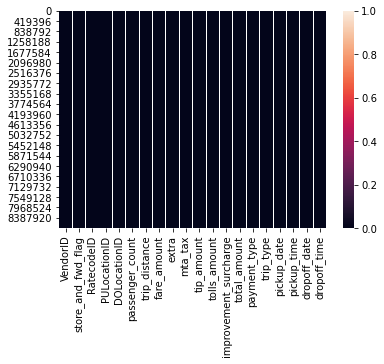

In [16]:
sns.heatmap(data.isnull())

In [17]:
# Before fit Missing Value

In [18]:
data[['trip_type']]

,trip_type
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
8807298,2.0
8807299,2.0
8807300,2.0
8807301,2.0


<AxesSubplot:xlabel='trip_type', ylabel='Density'>

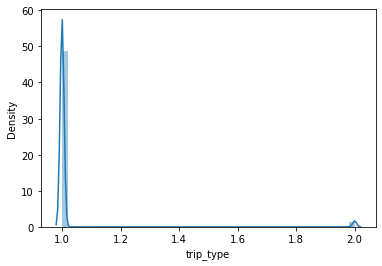

In [19]:
plt.subplot(1,1,1)
sns.distplot(data['trip_type'])


In [20]:
# Here we use mode we follow the trend of the data set from the graph we estimated that we used mode 

In [21]:
print('mode of trip_type =' ,data['trip_type'].mode()[0])


mode of trip_type = 1.0


In [22]:
data['trip_type']=data['trip_type'].fillna(data['trip_type'].mode()[0])

In [23]:
# After handle the missing value

In [24]:
data[['trip_type']]

,trip_type
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
8807298,2.0
8807299,2.0
8807300,2.0
8807301,2.0


In [25]:
data.isnull().sum()

VendorID                 0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
pickup_date              0
pickup_time              0
dropoff_date             0
dropoff_time             0
dtype: int64

In [ ]:
# graph after removing Missing value
sns.heatmap(data.isnull())

<AxesSubplot:>

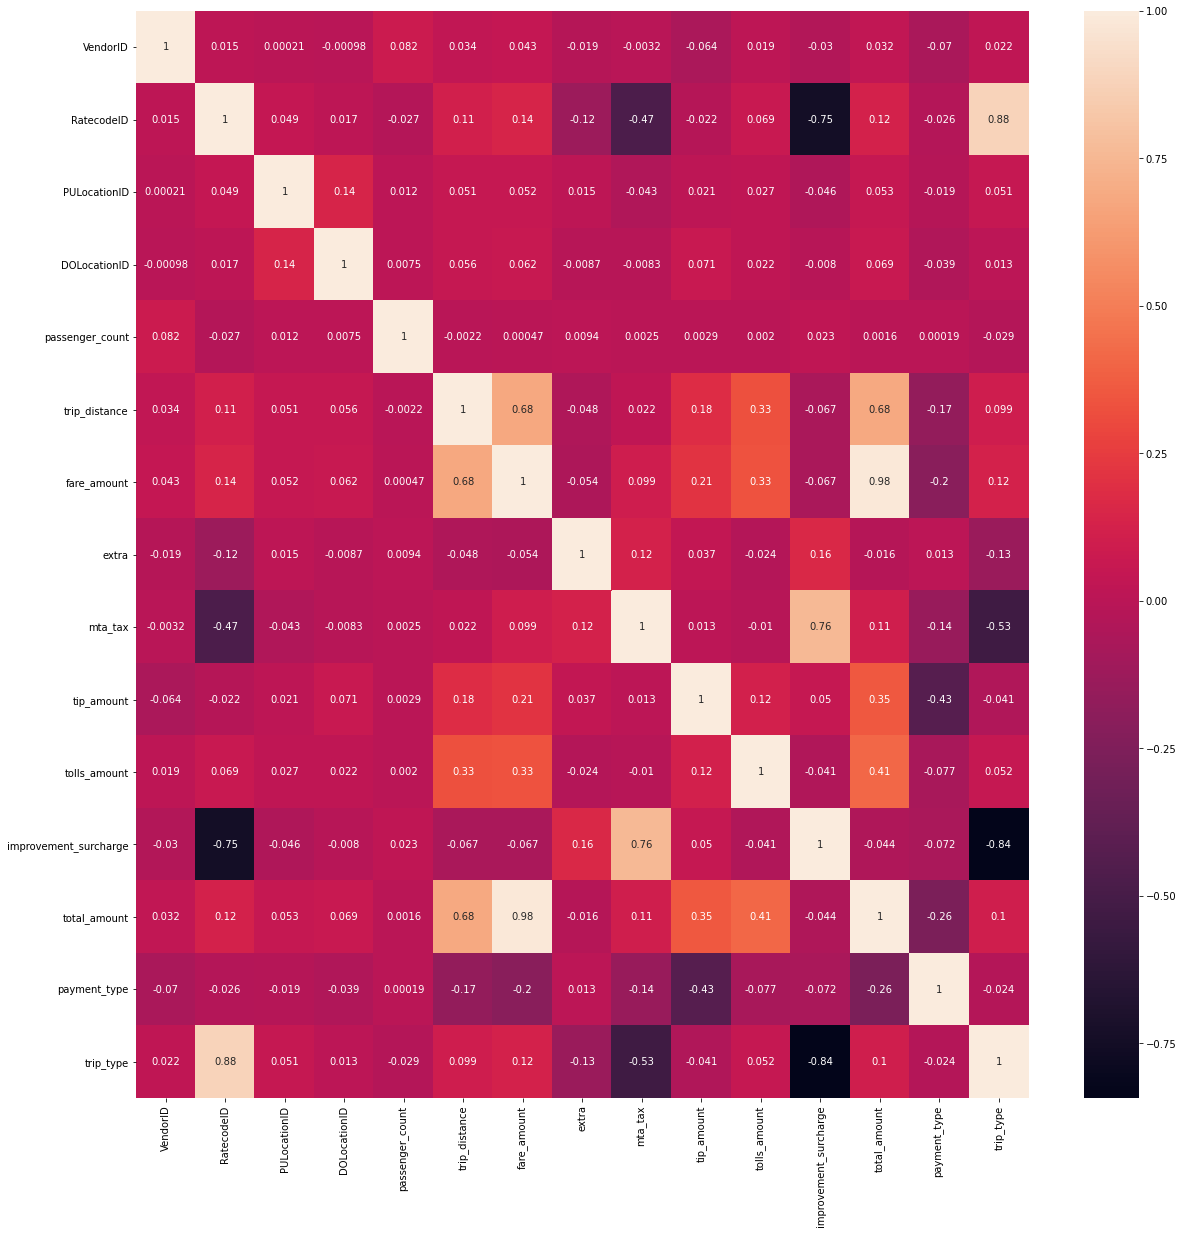

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr() , annot=True)

In [28]:
data.head()

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,pickup_date,pickup_time,dropoff_date,dropoff_time
0,2,N,1,74,75,1,1.33,6.0,0.0,0.5,0.0,0.0,0.3,6.8,2,1.0,2018-04-29,13:58:05,2018-04-29,14:02:49
1,2,N,1,74,75,1,1.12,6.0,0.0,0.5,0.0,0.0,0.3,6.8,2,1.0,2018-04-29,17:48:02,2018-04-29,17:52:55
2,2,N,1,74,75,1,1.10,6.0,0.0,0.5,0.0,0.0,0.3,6.8,2,1.0,2018-04-29,18:25:03,2018-04-29,18:30:59
3,2,N,1,74,75,1,1.02,6.0,0.0,0.5,0.0,0.0,0.3,6.8,2,1.0,2018-04-29,19:14:14,2018-04-29,19:20:35
4,2,N,1,74,75,1,1.46,6.0,0.0,0.5,0.0,0.0,0.3,6.8,2,1.0,2018-04-30,06:30:16,2018-04-30,06:34:57


In [29]:
# Removing Outliers

<AxesSubplot:xlabel='payment_type'>

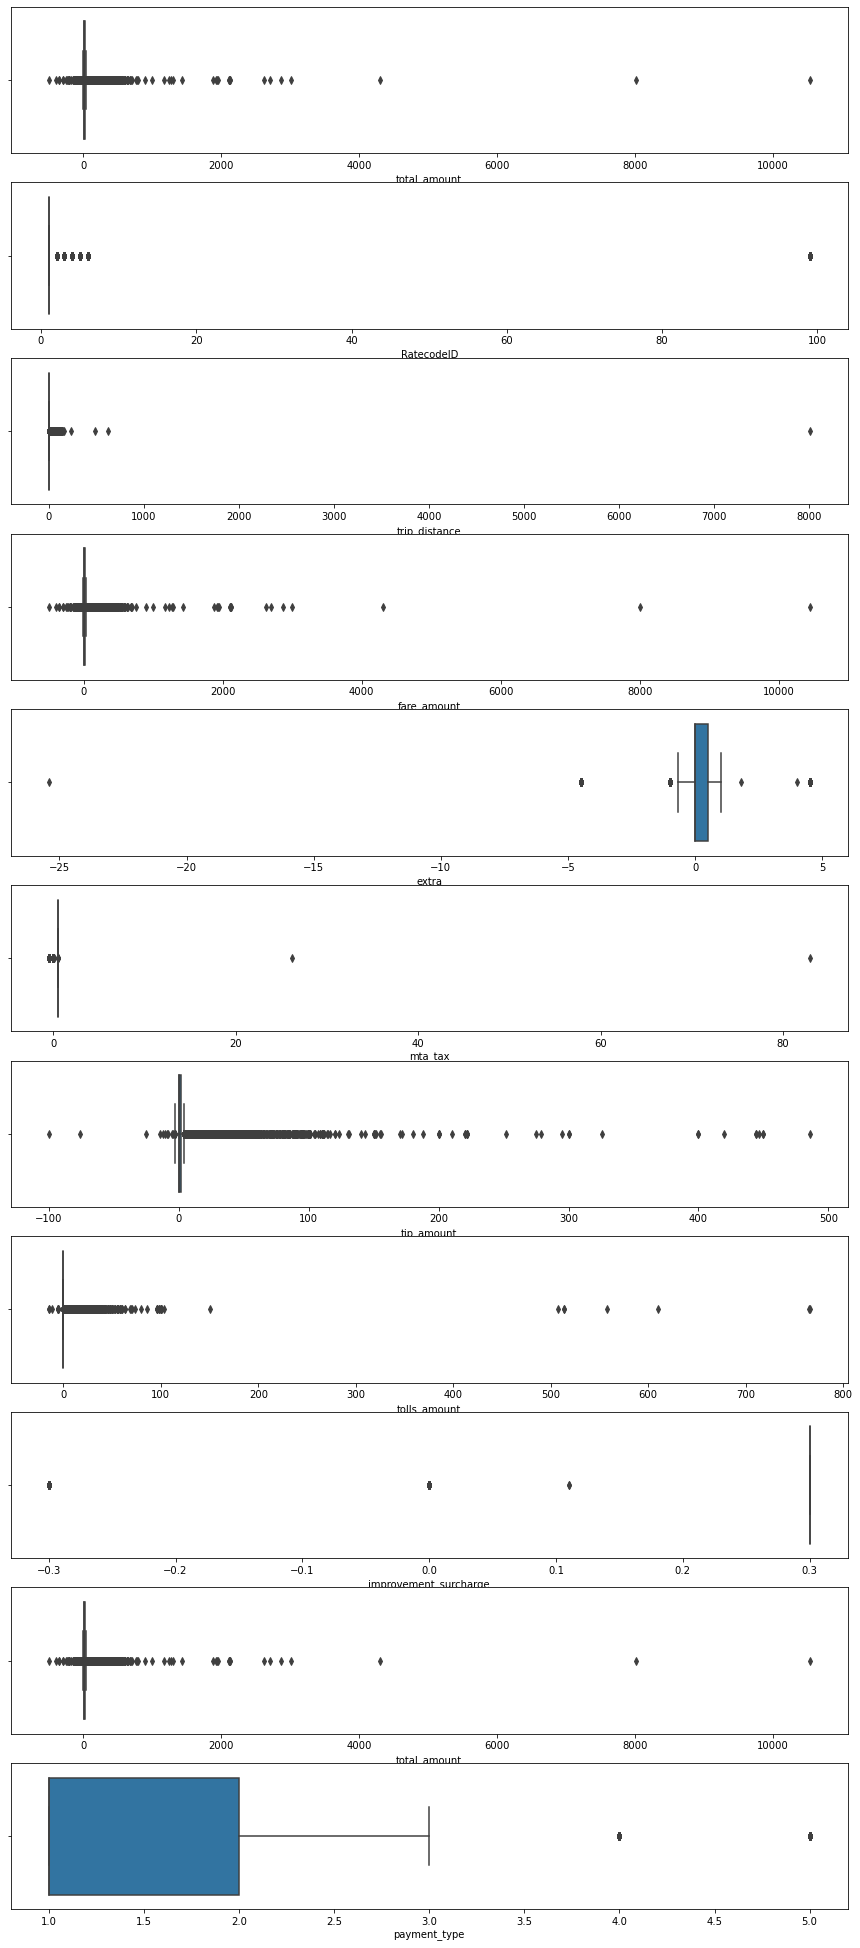

In [30]:
plt.figure(figsize=(15,35))
plt.subplot(11,1,1)
sns.boxplot(data['total_amount'])
plt.subplot(11,1,2)
sns.boxplot(data['RatecodeID'])
plt.subplot(11,1,3)
sns.boxplot(data['trip_distance'])
plt.subplot(11,1,4)
sns.boxplot(data['fare_amount'])
plt.subplot(11,1,5)
sns.boxplot(data['extra'])
plt.subplot(11,1,6)
sns.boxplot(data['mta_tax'])
plt.subplot(11,1,7)
sns.boxplot(data['tip_amount'])
plt.subplot(11,1,8)
sns.boxplot(data['tolls_amount'])
plt.subplot(11,1,9)
sns.boxplot(data['improvement_surcharge'])
plt.subplot(11,1,10)
sns.boxplot(data['total_amount'])
plt.subplot(11,1,11)
sns.boxplot(data['payment_type'])

In [31]:
data= data[(data['total_amount'] < 25) & (data['total_amount'] > 16) ]
data= data[(data['RatecodeID'] < 70) ]
data= data[(data['trip_distance'] < 4.8)  & (data['total_amount'] > 3.5)]
data= data[(data['fare_amount'] < 17) & (data['fare_amount'] > 11) ]
data= data[(data['extra'] < 3) & (data['extra'] > 0) ]
data= data[(data['mta_tax'] < 0.54) & (data['mta_tax'] > 0.4) ]
data= data[(data['tip_amount'] < 4.5) & (data['tip_amount'] > 0.8) ]
data= data[(data['tolls_amount'] < 2.8) & (data['tolls_amount'] > 2.6) ]
data= data[(data['improvement_surcharge'] < 0.35) & (data['improvement_surcharge'] > 0.150) ]
data= data[(data['total_amount'] < 25) & (data['total_amount'] > 16) ]
data= data[(data['payment_type'] < 4) & (data['payment_type'] > 0) ]

<AxesSubplot:xlabel='payment_type'>

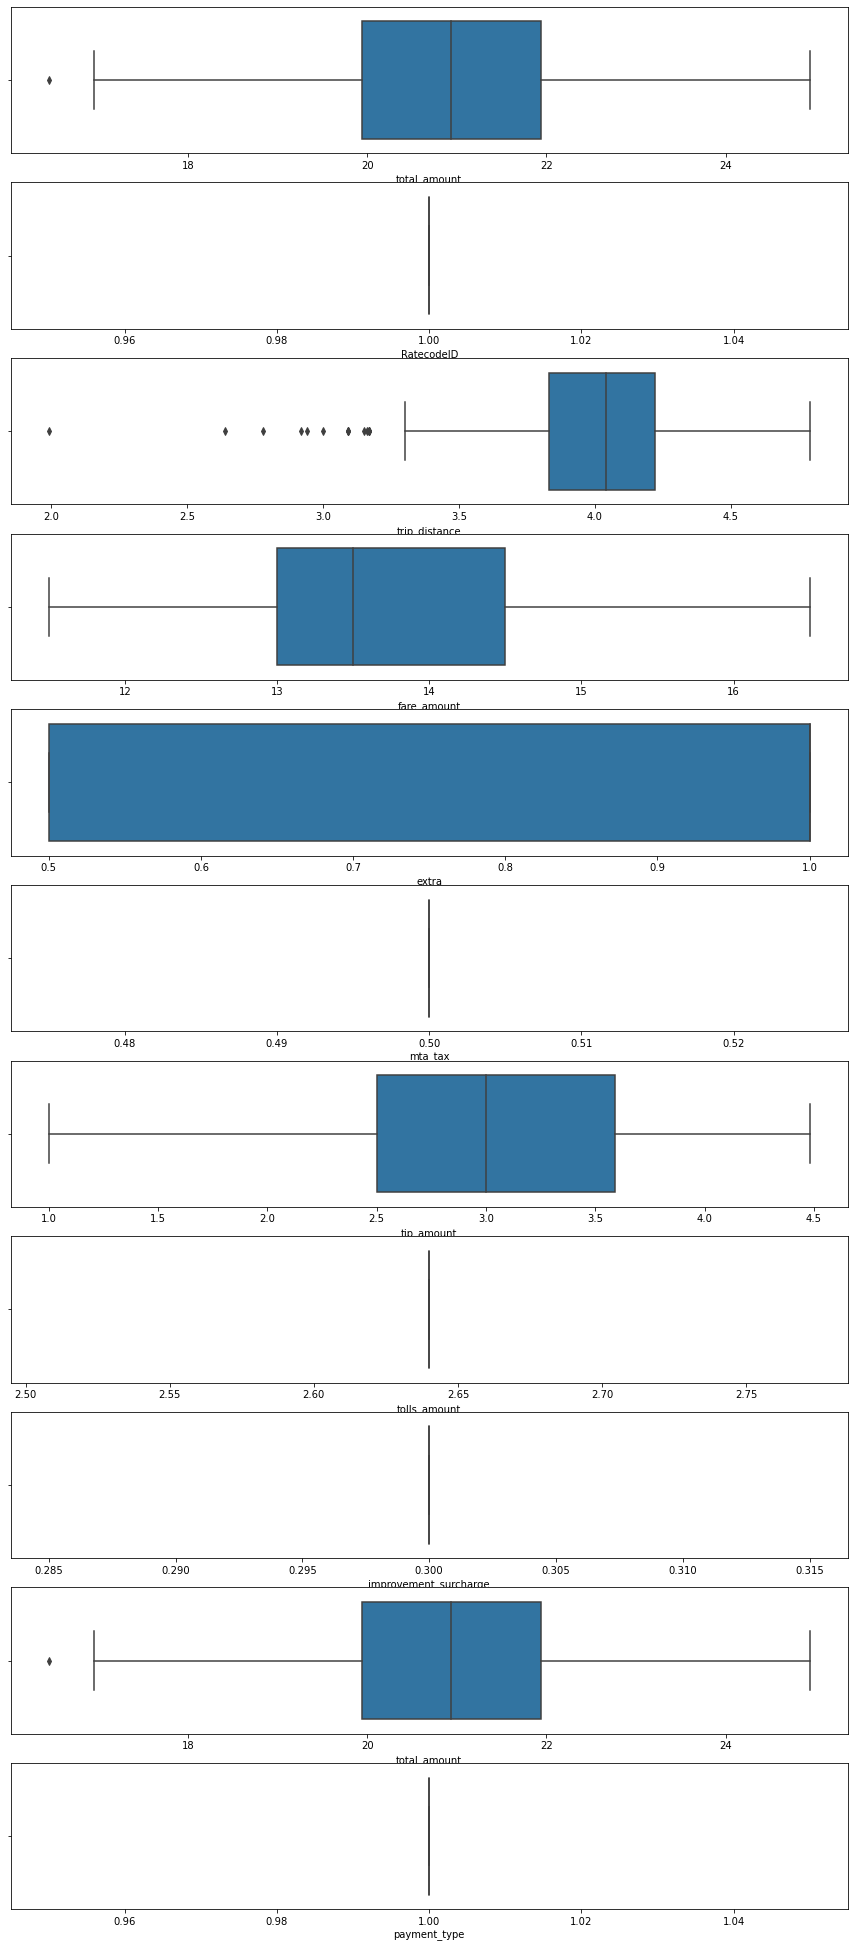

In [32]:
plt.figure(figsize=(15,35))
plt.subplot(11,1,1)
sns.boxplot(data['total_amount'])
plt.subplot(11,1,2)
sns.boxplot(data['RatecodeID'])
plt.subplot(11,1,3)
sns.boxplot(data['trip_distance'])
plt.subplot(11,1,4)
sns.boxplot(data['fare_amount'])
plt.subplot(11,1,5)
sns.boxplot(data['extra'])
plt.subplot(11,1,6)
sns.boxplot(data['mta_tax'])
plt.subplot(11,1,7)
sns.boxplot(data['tip_amount'])
plt.subplot(11,1,8)
sns.boxplot(data['tolls_amount'])
plt.subplot(11,1,9)
sns.boxplot(data['improvement_surcharge'])
plt.subplot(11,1,10)
sns.boxplot(data['total_amount'])
plt.subplot(11,1,11)
sns.boxplot(data['payment_type'])


<AxesSubplot:xlabel='trip_distance', ylabel='total_amount'>

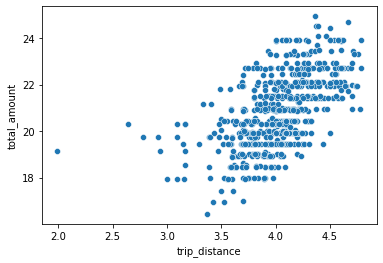

In [33]:
# passenger count with the trip distance
sns.scatterplot(x=data['trip_distance'], y=data['total_amount'] )

<AxesSubplot:>

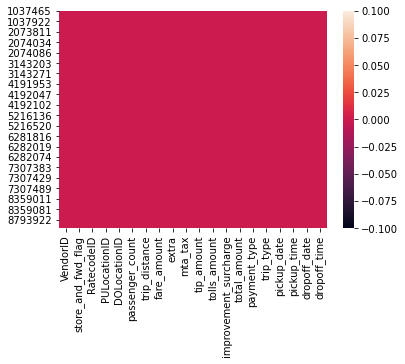

In [60]:
# After Removin an outliers
sns.heatmap(data.isnull())


<AxesSubplot:xlabel='total_amount', ylabel='passenger_count'>

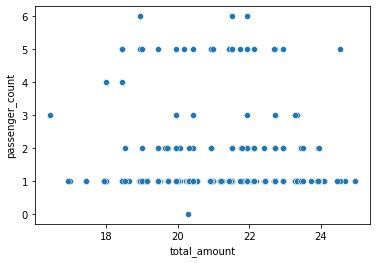

In [34]:
# mean of passenger coount 
sns.scatterplot(y=data['passenger_count'],x=data['total_amount'])

<AxesSubplot:xlabel='payment_type', ylabel='total_amount'>

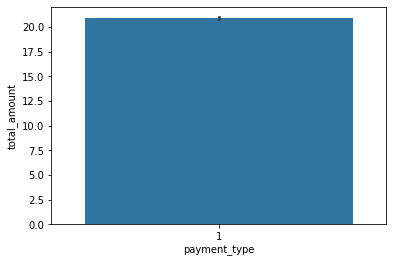

In [35]:
# average total amount spend from the passenger 
sns.barplot(x=data['payment_type'],  y=data['total_amount'])

<AxesSubplot:xlabel='mta_tax', ylabel='total_amount'>

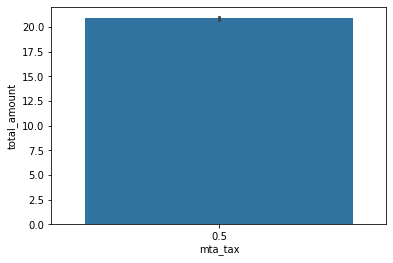

In [36]:
# total amount with mta_tax
sns.barplot(y=data['total_amount'] , x=data['mta_tax'])

In [37]:
## Split data  set

In [38]:
x =data[['trip_type' ,'payment_type', 'trip_distance' , 'passenger_count','PULocationID','DOLocationID']]
y=data[['fare_amount']]

In [39]:
x.head()

,trip_type,payment_type,trip_distance,passenger_count,PULocationID,DOLocationID
1037465,1.0,1,4.67,1,244,200
1037505,1.0,1,4.57,1,244,200
1037514,1.0,1,3.82,1,244,200
1037548,1.0,1,4.00,1,244,200
1037549,1.0,1,4.20,1,127,200


In [40]:
y.head()

,fare_amount
1037465,15.0
1037505,15.5
1037514,14.5
1037548,13.0
1037549,14.5


### Test train split data set / Model Selction


In [41]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train, y_test =train_test_split(x,y,test_size=0.2 ,random_state=0)

In [42]:
print('size of x_train' , x_train.shape)
print('size of x_test' , x_test.shape)
print('size of y_train' , x_train.shape)
print('size of y_test' , x_test.shape)

size of x_train (533, 6)
size of x_test (134, 6)
size of y_train (533, 6)
size of y_test (134, 6)


### Model selection

In [43]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(x_train ,y_train)

### Price prediction


In [44]:
#'trip_type' ,'payment_type', 'trip_distance' ,
#'passenger_count','PULocationID','DOLocationID'
model.predict([[1,2 ,1.5,1,45,74]])

array([[11.95056501]])

In [45]:
mlr = pd.DataFrame({'Actual_value' : y_test.squeeze() , "Model prediction" : model.predict(x_test).squeeze() })
mlr

,Actual_value,Model prediction
8359015,14.5,14.349766
4192200,15.0,14.809269
1037889,14.0,13.559617
7307483,13.5,14.029436
2073995,14.5,14.243312
...,...,...
8358986,13.5,13.580972
7307840,12.0,12.961989
3143259,13.0,13.559617
7307425,13.0,13.260642


In [46]:
# Model Evaluation

In [47]:
model.score(x_test, y_test)


0.5651735767315661

In [51]:
model.score(x_train , y_train)

0.5082262629801888

In [52]:
print('Score for test model =' , model.score(x_test , y_test)  )
print('Score for train model =' , model.score(x_train , y_train) )

Score for test model = 0.5651735767315661
Score for train model = 0.5082262629801888


In [ ]:
## Future prediction

In [53]:
model.predict([[1,2 ,1.5,1,45,67]])

array([[12.06654451]])

## Error

In [54]:
from sklearn import metrics

In [55]:
print('mean absolute error', metrics.mean_absolute_error(y_test , model.predict(x_test)) )

mean absolute error 0.5579432578144219


In [56]:
print('mean square error' ,metrics.mean_squared_error(y_test,model.predict(x_test)))

mean square error 0.5571243818400203


In [57]:
print('root mean square error' ,np.sqrt(metrics.mean_squared_error(y_test,model.predict(x_test))))

root mean square error 0.7464076512469713


# Graph

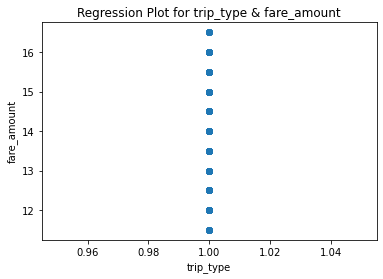

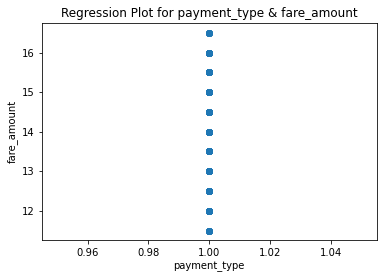

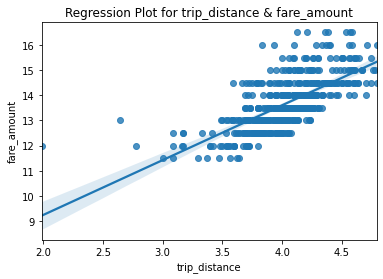

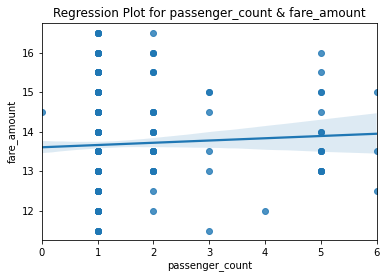

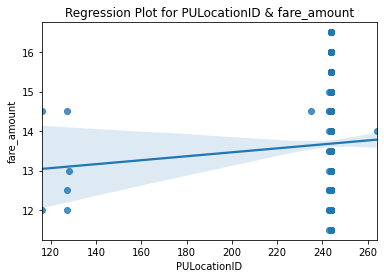

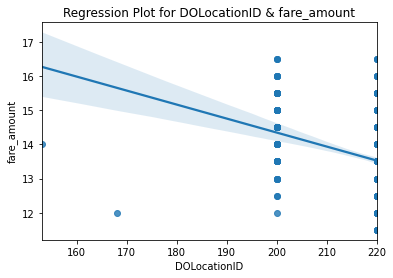

In [58]:
variables =['trip_type' ,'payment_type', 'trip_distance' , 'passenger_count','PULocationID','DOLocationID']
y=data[['fare_amount']]

for var in variables:
    sns.regplot(x_train[var],y_train['fare_amount']).set(title=f'Regression Plot for {var} & fare_amount')
    plt.show()

In [ ]:
### Conclusion

The Multiple Linear Regression model performs well as 58.75% of the data fit the regression model.


